# Data Wrangling

In [1]:
# Import the packages in need

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from folium import plugins
import plotly.express as px 
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly import tools
import bokeh
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import jitter
import seaborn as sns
from folium.plugins import MarkerCluster
import wget
import requests

In [2]:
# Chose the style plot 

plt.style.use("classic")

In [3]:
# Import dataset

london_data = pd.read_csv('Dataset/london_crime_by_lsoa.csv')
print("Num of rows:", london_data.shape[0])
print("Num of cols:", london_data.shape[1])

Num of rows: 13490604
Num of cols: 7


In [4]:
# Show the Dataframe

display(london_data.head())
display(london_data.tail())

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

lsoa_code     borough               major_category  \
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6

In [5]:
# Missing Value Detected

london_data.info()
london_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [6]:
# Indexing

london_data.index = np.arange(1, len(london_data) + 1)

In [7]:
# Show the Dataframe

display(london_data.head())
display(london_data.tail())

lsoa_code     borough               major_category  \
1  E01001116     Croydon                     Burglary   
2  E01001646   Greenwich  Violence Against the Person   
3  E01000677     Bromley  Violence Against the Person   
4  E01003774   Redbridge                     Burglary   
5  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
1  Burglary in Other Buildings      0  2016     11  
2               Other violence      0  2016     11  
3               Other violence      0  2015      5  
4  Burglary in Other Buildings      0  2016      3  
5            Personal Property      0  2008      6

lsoa_code     borough               major_category  \
13490600  E01000504       Brent              Criminal Damage   
13490601  E01002504  Hillingdon                      Robbery   
13490602  E01004165      Sutton                     Burglary   
13490603  E01001134     Croydon                      Robbery   
13490604  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
13490600  Criminal Damage To Dwelling      0  2015      2  
13490601            Personal Property      1  2015      6  
13490602       Burglary in a Dwelling      0  2011      2  
13490603            Business Property      0  2011      5  
13490604                 Wounding/GBH      0  2015      6

In [8]:
# Describe the Info Datasheet

london_data.describe(include = 'O').transpose()

count unique                 top     freq
lsoa_code       13490604   4835           E01003783     3456
borough         13490604     33             Croydon   602100
major_category  13490604      9  Theft and Handling  3966300
minor_category  13490604     32         Other Theft   522180

# Data Visualization (Descriptive)

### 1. Which number of major category of crime are most in London ?

In [9]:
# First, let's see the percentage of events for each category

criminal_summary = london_data.groupby('major_category').sum()['value']
criminal_summary

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

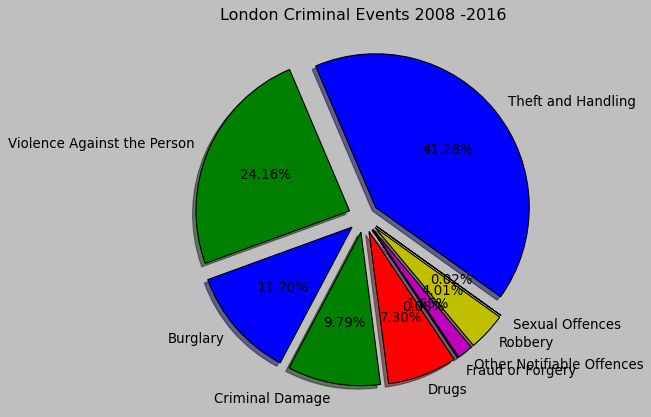

In [10]:
# Lets Visualize !

explode_sequence = ('0.1,' * len(criminal_summary)).split(',')
explode_sequence=[float(item) for item in explode_sequence if item !=""]

plt.pie(criminal_summary,explode=explode_sequence, labels=criminal_summary.index, autopct='%1.2f%%',
        shadow=True, startangle=200);
plt.title("London Criminal Events 2008 -2016");

### 2. Where Is The Unsafe Borough of London ?

In [11]:
# Step 1: Create data for each borough

borough_summary = london_data.groupby('borough').sum()[['value']]
borough_summary

value
borough                       
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Camden                  275147
City of London             780
Croydon                 260294
Ealing                  251562
Enfield                 193880
Greenwich               181568
Hackney                 217119
Hammersmith and Fulham  185259
Haringey                213272
Harrow                  116848
Havering                138947
Hillingdon              209680
Hounslow                186772
Islington               230286
Kensington and Chelsea  171981
Kingston upon Thames     89306
Lambeth                 292178
Lewisham                215137
Merton                  115654
Newham                  262024
Redbridge               183562
Richmond upon Thames     96771
Southwark               278809
Sutton                  100987
Tower Hamlets           228613
Waltham Forest          203879
Wandsworth              204741
Westminster             455028

In [12]:
# Step 2 : Sort th value

bs_sort = borough_summary.sort_values("value")

In [13]:
# Step 2 : Sort th value

bs_sort

value
borough                       
City of London             780
Kingston upon Thames     89306
Richmond upon Thames     96771
Sutton                  100987
Bexley                  114136
Merton                  115654
Harrow                  116848
Havering                138947
Barking and Dagenham    149447
Kensington and Chelsea  171981
Greenwich               181568
Redbridge               183562
Bromley                 184349
Hammersmith and Fulham  185259
Hounslow                186772
Enfield                 193880
Waltham Forest          203879
Wandsworth              204741
Hillingdon              209680
Barnet                  212191
Haringey                213272
Lewisham                215137
Hackney                 217119
Brent                   227551
Tower Hamlets           228613
Islington               230286
Ealing                  251562
Croydon                 260294
Newham                  262024
Camden                  275147
Southwark               278809
Lambeth                 292178
Westminster             455028

Text(0.5, 0, 'Number of Crime')

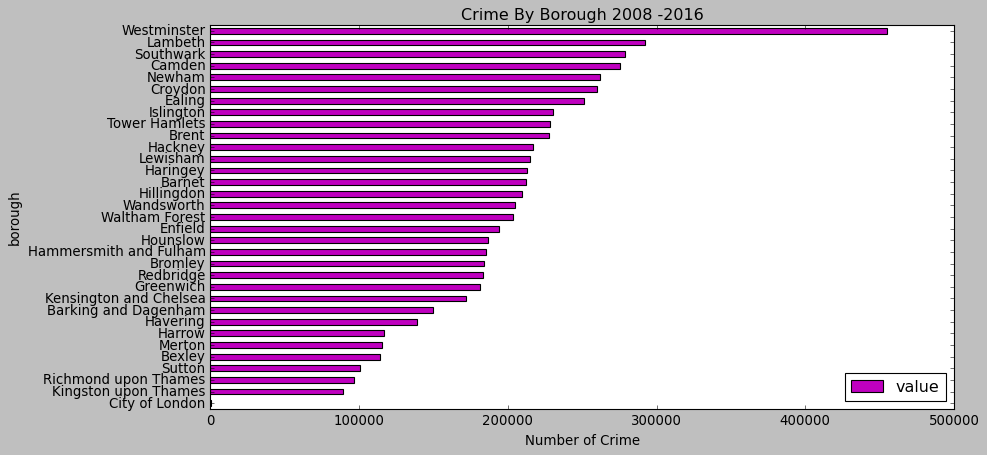

In [14]:
# Step 3 : Lets Visualize

bs_sort.plot(kind = 'barh', figsize = (12,6), color = 'm', title = 'Crime By Borough 2008 -2016')
plt.xlabel('Number of Crime')

## 3. Which number of minor category of crime are most in Westminister ?

In [15]:
#Create the table list of minor category

criminal_west_summary = london_data.loc[london_data['borough']=='Westminster', :] \
    .groupby(['minor_category']) \
    .agg(total_incidents = pd.NamedAgg('value', np.sum)).reset_index()
criminal_west_summary

minor_category  total_incidents
0                      Assault with Injury            20219
1              Burglary in Other Buildings            17184
2                   Burglary in a Dwelling            12111
3                        Business Property              702
4                           Common Assault            19127
5                       Counted per Victim              143
6              Criminal Damage To Dwelling             3427
7         Criminal Damage To Motor Vehicle             7514
8        Criminal Damage To Other Building             3990
9                         Drug Trafficking             1657
10                          Going Equipped              407
11                   Handling Stolen Goods              825
12                              Harassment            20976
13  Motor Vehicle Interference & Tampering             1501
14                                  Murder               28
15                        Offensive Weapon             1818
16                   Other Criminal Damage             5474
17                             Other Drugs              268
18                   Other Fraud & Forgery              130
19                        Other Notifiable             5741
20                            Other Sexual               54
21                             Other Theft           142032
22                      Other Theft Person            56756
23                          Other violence             3135
24                       Personal Property            15050
25                     Possession Of Drugs            32106
26                                    Rape                5
27                Theft From Motor Vehicle            21735
28                        Theft From Shops            35929
29           Theft/Taking Of Motor Vehicle             6108
30             Theft/Taking of Pedal Cycle            12731
31                            Wounding/GBH             6145

In [16]:
# Put the top 10

cws_top10 = criminal_west_summary.sort_values("total_incidents", ascending=False).head(10)
cws_top10

minor_category  total_incidents
21                  Other Theft           142032
22           Other Theft Person            56756
28             Theft From Shops            35929
25          Possession Of Drugs            32106
27     Theft From Motor Vehicle            21735
12                   Harassment            20976
0           Assault with Injury            20219
4                Common Assault            19127
1   Burglary in Other Buildings            17184
24            Personal Property            15050

[Text(0.5, 1.0, 'Top 10 Westminster Minor Criminal Events 2008 -2016')]

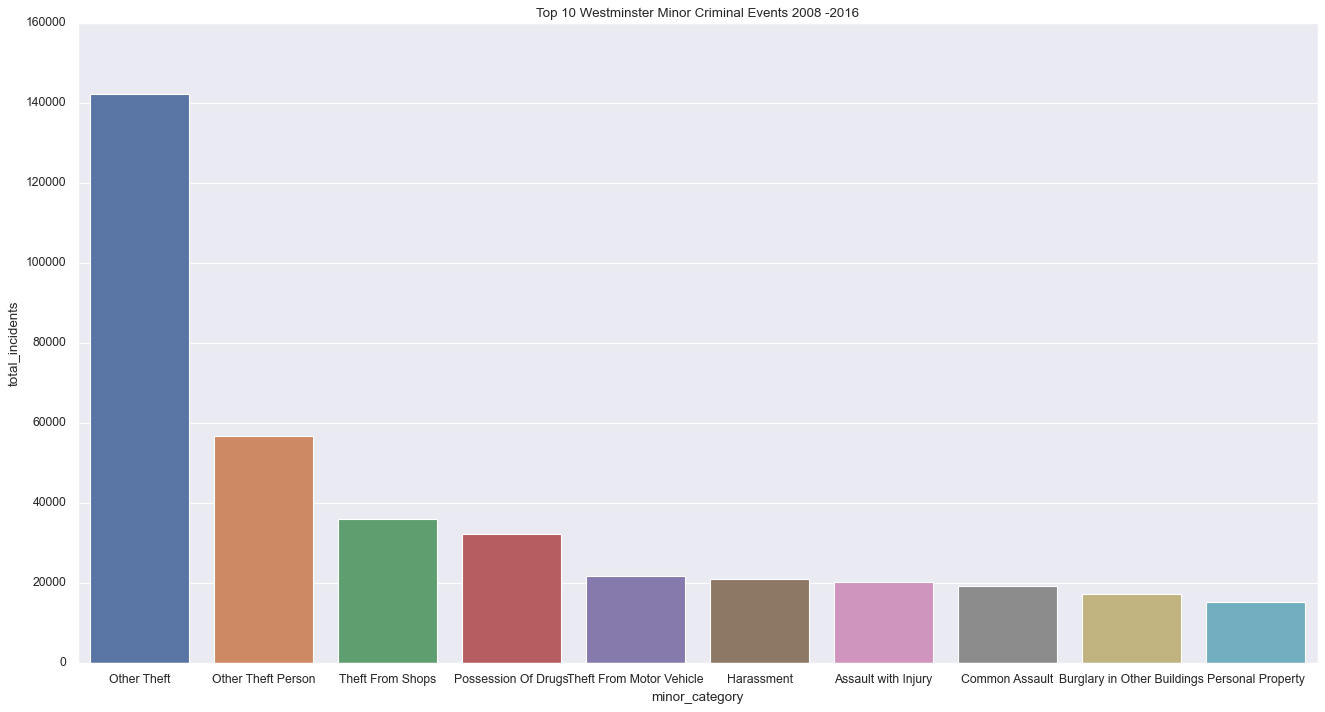

In [17]:
# Lets Visualize

sns.set_theme(style="ticks")

# Plot the orbital period with horizontal boxes
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="minor_category", y="total_incidents", data=cws_top10) \
        .set(title='Top 10 Westminster Minor Criminal Events 2008 -2016')

## 4. Where the higest Crime Rate in London ?

In [18]:
# download countries geojson london map file
url = 'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'
london_geo = wget.download(url)

100% [..........................................................................] 1346444 / 1346444

In [19]:
# Lets visualize !

london_map=folium.Map(location=[54.237933,-2.36967],zoom_start=100,tiles = 'Mapbox Bright')

london_map.choropleth(
    geo_data=london_geo,
    name='choropleth',
    data=london_data,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=1, 
    line_opacity=1,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
display(london_map)

# Please drag to find london map!

C:\Users\Lenovo\anaconda3\envs\hacktiv8-env\lib\site-packages\folium\folium.py:411: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



## 5. What correlation in London Data ?

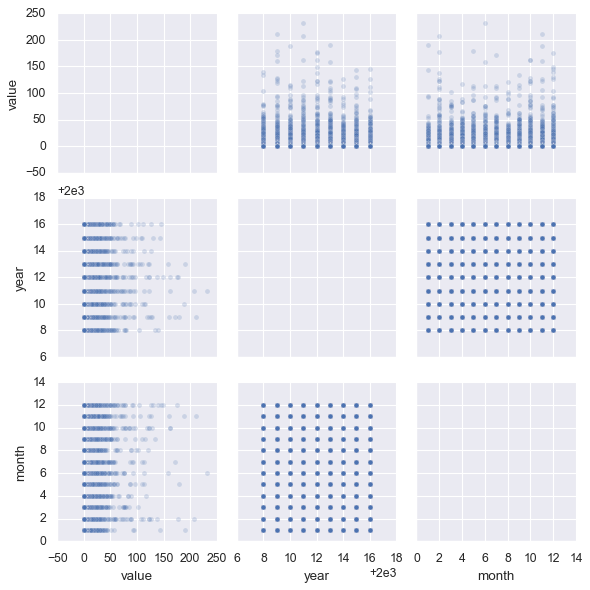

In [20]:
# Scatterplot Matrix

sns.pairplot(
    data=london_data.sample(frac=.1), 
    kind='scatter', 
    diag_kind='scatter', 
    plot_kws={'alpha': .2} 
)

# Data Visualization (Time Series Analysis)

## 6. How Trend Crimes in London ?

In [21]:
# First, let's see the events of the monthy the crime in London

data_per_month = london_data.groupby(['year','month']) \
    .agg(number = pd.NamedAgg('value', np.sum)).reset_index()
data_per_month 

year  month  number
0    2008      1   65419
1    2008      2   62626
2    2008      3   61343
3    2008      4   59640
4    2008      5   62587
..    ...    ...     ...
103  2016      8   62666
104  2016      9   61412
105  2016     10   63405
106  2016     11   61064
107  2016     12   62455

[108 rows x 3 columns]

In [22]:
# Create Index of the datetime from year & month varialbe

df=data_per_month.sort_values(['year','month'])
df['date'] = pd.to_datetime(df.year.map(str) + '-' + df.month.map(str), format = '%Y-%m');
df.set_index('date', inplace=True);

In [23]:
df.head()

year  month  number
date                           
2008-01-01  2008      1   65419
2008-02-01  2008      2   62626
2008-03-01  2008      3   61343
2008-04-01  2008      4   59640
2008-05-01  2008      5   62587

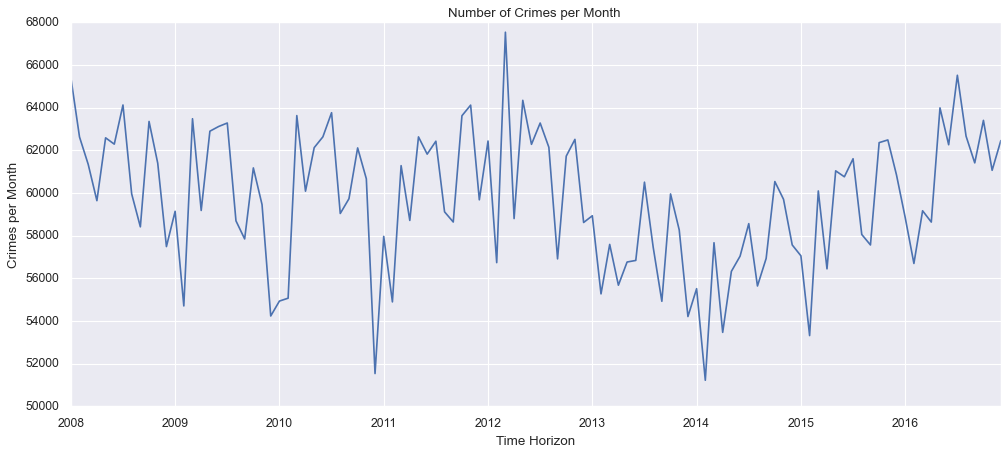

In [24]:
# Lets visualize Number of Crimes per Month 

df.number.plot(figsize=(15, 6))
plt.title('Number of Crimes per Month ')
plt.ylabel('Crimes per Month')
plt.xlabel('Time Horizon')
plt.show()

In [25]:
# Lets visualize Average Crimes per Month

fig = px.box(x=df.month, y=df['number'], points="all")

fig.update_layout(
	title='Average Number of Crimes for Each Month',
	xaxis_title_text = 'Months of the Year',
	yaxis_title_text = 'Average Crimes per Month'
)

fig.show()

In [26]:
# dictionary day for Month.

month={1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}

df['CrimePerDay'] = df.apply(lambda x:(x.number/month.get(x.month,0)), axis=1)

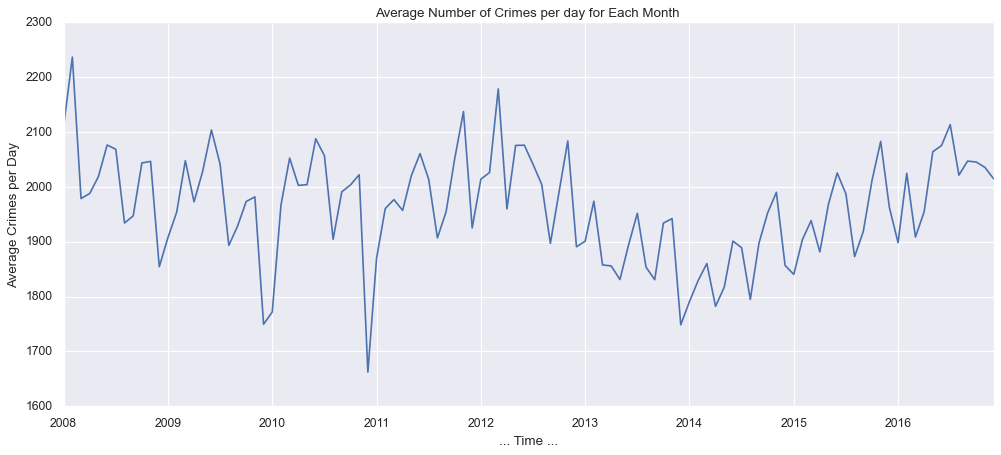

In [27]:
# Lets visualize Average Number of Crimes per day for Each Month

df.CrimePerDay.plot(figsize=(15, 6))
plt.title('Average Number of Crimes per day for Each Month ')
plt.ylabel('Average Crimes per Day')
plt.xlabel('... Time ...')
plt.show()

In [28]:
# Create the table average Crime per Day

df_london_month=df.groupby(["month"]).sum()

df_london_month['month']=df_london_month.index
df_london_month=df_london_month[['month','number']]
df_london_month['CrimePerDay']=df_london_month.apply(lambda x:(x.number/month.get(x.month,0)), axis=1)
df_london_month

month  number   CrimePerDay
month                             
1          1  530247  17104.741935
2          2  500537  17876.321429
3          3  551795  17799.838710
4          4  520648  17354.933333
5          5  552704  17829.161290
6          6  549041  18301.366667
7          7  563076  18163.741935
8          8  532784  17186.580645
9          9  522377  17412.566667
10        10  558252  18008.129032
11        11  549671  18322.366667
12        12  516626  16665.354839

In [29]:
# Lets visualize Number of Crimes for Each Month in Each Year

fig = px.area(data_per_month, x="month", y="number", line_group="year", color="year")


fig.update_layout(
	title='Number of Crimes for Each Month in Each Year',
	xaxis_title_text = 'Months of the Year',
	yaxis_title_text = 'Number of Crimes per Month'
)
fig.show()

In [30]:
# Create the Histogram Number of Crimes for Each Year

fig = px.histogram(data_frame=df, x='year', y='number')
fig.update_layout(
	title='Number of Crimes for Each Year',
	xaxis_title_text = 'Year',
	yaxis_title_text = 'Number of Crimes'
)
fig.show()

## 7. What The Christmas Effect in London Crimes ?

In [31]:
# Create the percentage

baseline = df.CrimePerDay.mean()
df['diff_percentage'] = 100 * (df.CrimePerDay/baseline - 1)

In [32]:
# Create the tresshold

upper=100 * ((df.CrimePerDay.mean() + df.CrimePerDay.std())/baseline -1)
lower=100 * ((df.CrimePerDay.mean() - df.CrimePerDay.std())/baseline-1)

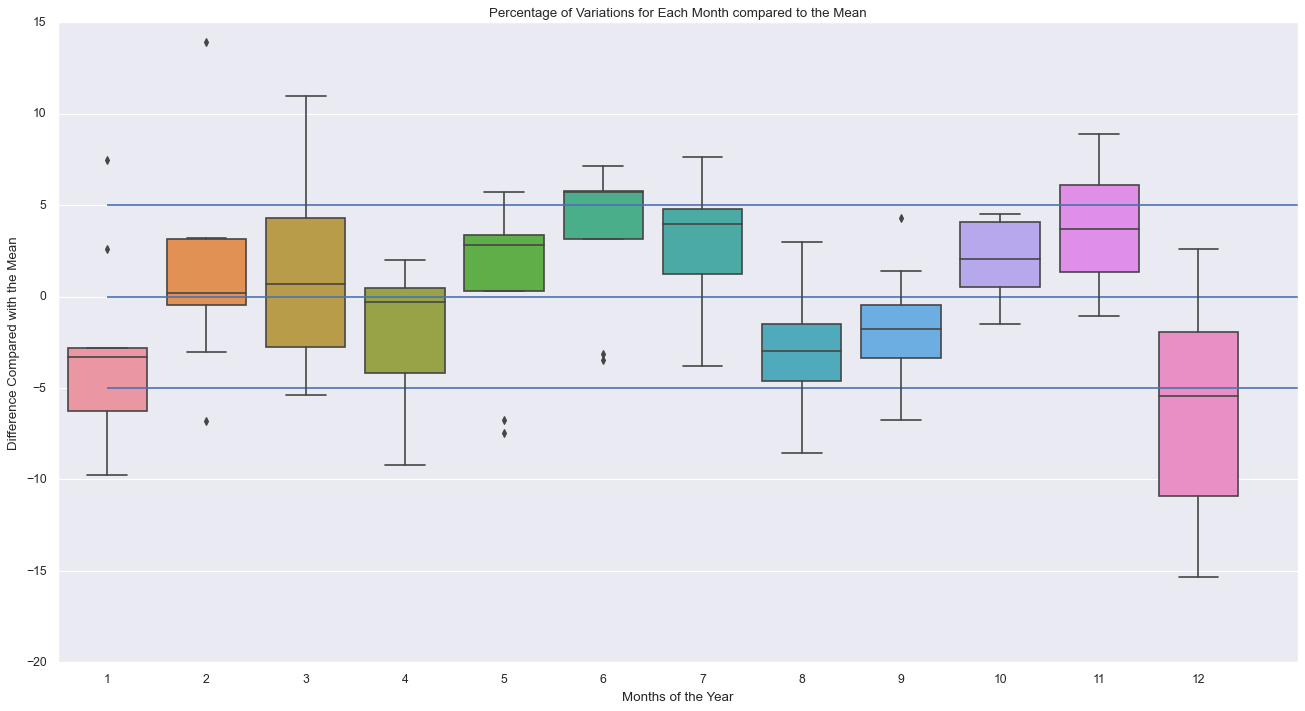

In [33]:
# Lets visualize Percentage of Variations for Each Month compared to the Mean

sns.boxplot(x=df['month'], y=df['diff_percentage'])
plt.hlines(upper, 0, 12)
plt.hlines(0,0,12)
plt.hlines(lower, 0, 12);
plt.title('Percentage of Variations for Each Month compared to the Mean');
plt.ylabel('Difference Compared with the Mean');
plt.xlabel('Months of the Year');

In [34]:
# Create the Number of Major Crime on Desember in London

december_major_crime = london_data.loc[london_data['month']==12, :] \
        .groupby('major_category').count()[['value']]
december_major_crime

value
major_category                     
Burglary                      86967
Criminal Damage              172431
Drugs                         98289
Fraud or Forgery              19710
Other Notifiable Offences     64692
Robbery                       78282
Sexual Offences                9009
Theft and Handling           330525
Violence Against the Person  264312

In [35]:
# Crate the word string for major category

max_words = 10000

word_string_major = ""
for major_category in december_major_crime.index:
    num_repeat = int(december_major_crime.loc[major_category] / float(december_major_crime.value.sum()) * max_words)
    word_string_major = word_string_major + ((major_category + " ") * num_repeat)
    
word_string_major

'Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary Burglary 

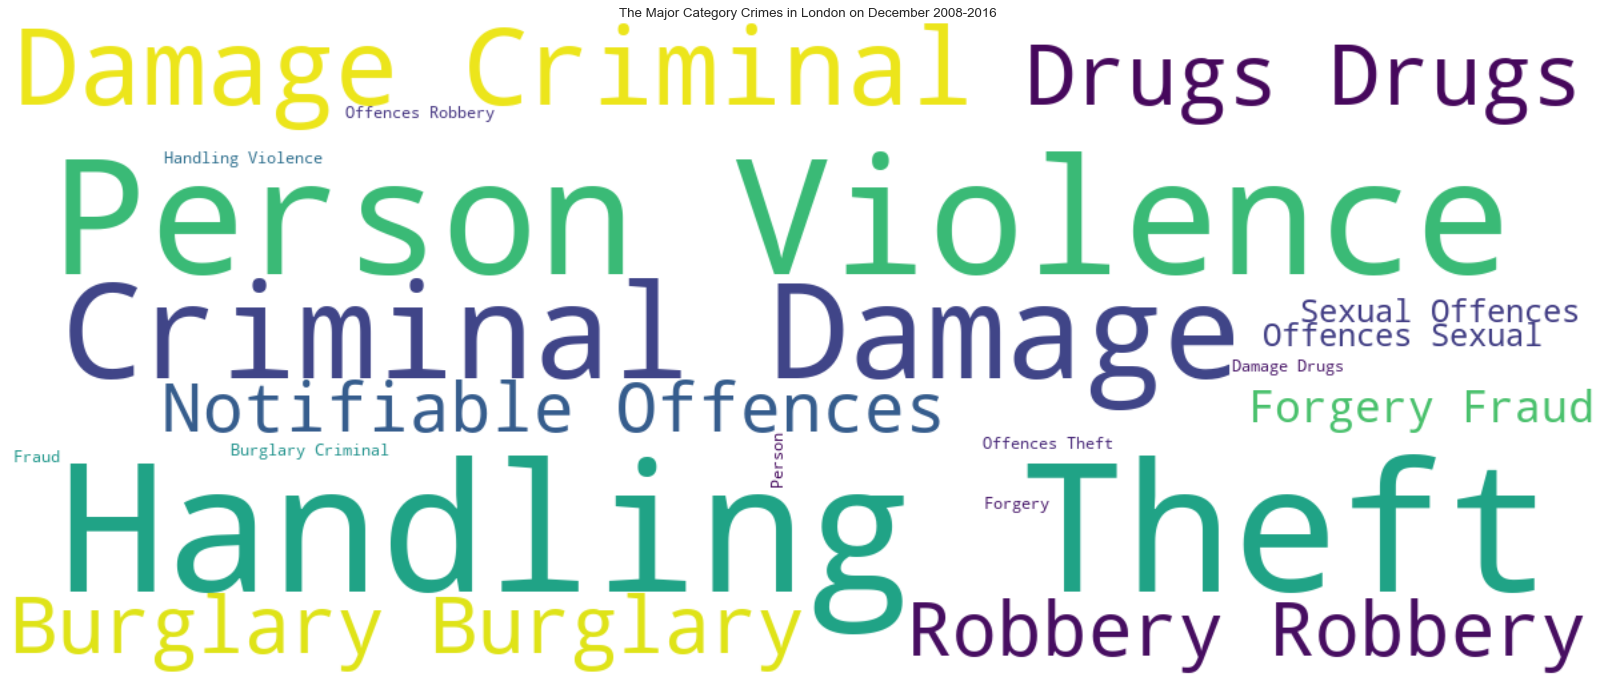

In [36]:
# Lets the visualize the wordcloud

wordcloud_major = WordCloud(background_color='white', mode="RGB", width=1200, height=500).generate(word_string_major)
wordcloud_major

plt.figure(figsize=(20,10))
plt.title('The Major Category Crimes in London on December 2008-2016')
plt.imshow(wordcloud_major, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
# Create the Number of Minor Crime on Desember in London

december_minor_crime = london_data.loc[london_data['month']==12, :] \
        .groupby('minor_category').count()[['value']]
december_minor_crime

value
minor_category                               
Assault with Injury                     43488
Burglary in Other Buildings             43506
Burglary in a Dwelling                  43461
Business Property                       34893
Common Assault                          43515
Counted per Victim                      11493
Criminal Damage To Dwelling             43452
Criminal Damage To Motor Vehicle        43497
Criminal Damage To Other Building       41994
Drug Trafficking                        40878
Going Equipped                          21384
Handling Stolen Goods                   35514
Harassment                              43506
Motor Vehicle Interference & Tampering  43371
Murder                                   7695
Offensive Weapon                        40158
Other Criminal Damage                   43488
Other Drugs                             13932
Other Fraud & Forgery                    8217
Other Notifiable                        43308
Other Sexual                             6759
Other Theft                             43515
Other Theft Person                      43290
Other violence                          42669
Personal Property                       43389
Possession Of Drugs                     43479
Rape                                     2250
Theft From Motor Vehicle                43515
Theft From Shops                        34731
Theft/Taking Of Motor Vehicle           43506
Theft/Taking of Pedal Cycle             43083
Wounding/GBH                            43281

In [38]:
# Crate the word string for minor category

max_words = 100000

word_string_minor = ""
for minor_category in december_minor_crime.index:
    num_repeat = int(december_minor_crime.loc[minor_category] / float(december_minor_crime.value.sum()) * max_words)
    word_string_minor = word_string_minor + ((minor_category + " ") * num_repeat)
    
word_string_minor

'Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury Assault with Injury

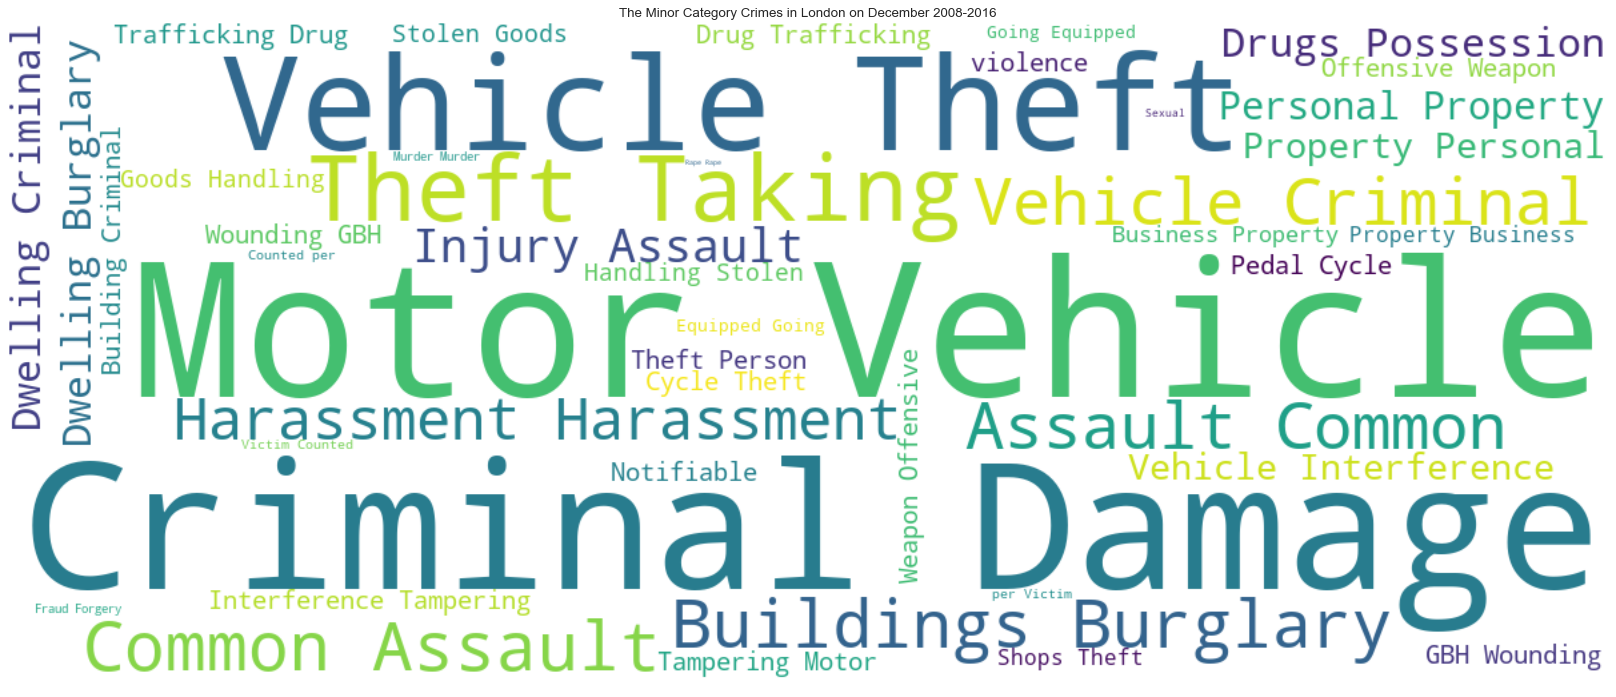

In [39]:
# Create the wordcloud

wordcloud_minor = WordCloud(background_color='white', mode="RGB", width=1200, height=500).generate(word_string_minor)
wordcloud_minor

# display the cloud
plt.figure(figsize=(20,10))
plt.title('The Minor Category Crimes in London on December 2008-2016')
plt.imshow(wordcloud_minor, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## What The Major Category Incrasese Growth in London ?

In [40]:
# Create the table of total crime per year of each major category

growing_crime = london_data.groupby(['year','major_category']) \
    .agg(Total_Crime = pd.NamedAgg('value', np.sum)).reset_index()
growing_crime.head()

year             major_category  Total_Crime
0  2008                   Burglary        88092
1  2008            Criminal Damage        91872
2  2008                      Drugs        68804
3  2008           Fraud or Forgery         5325
4  2008  Other Notifiable Offences        10112

In [41]:
# Create the format datetime

growing_crime.set_index(pd.to_datetime(growing_crime.year, format = '%Y'), inplace = True)
growing_crime.head()

year             major_category  Total_Crime
year                                                    
2008-01-01  2008                   Burglary        88092
2008-01-01  2008            Criminal Damage        91872
2008-01-01  2008                      Drugs        68804
2008-01-01  2008           Fraud or Forgery         5325
2008-01-01  2008  Other Notifiable Offences        10112

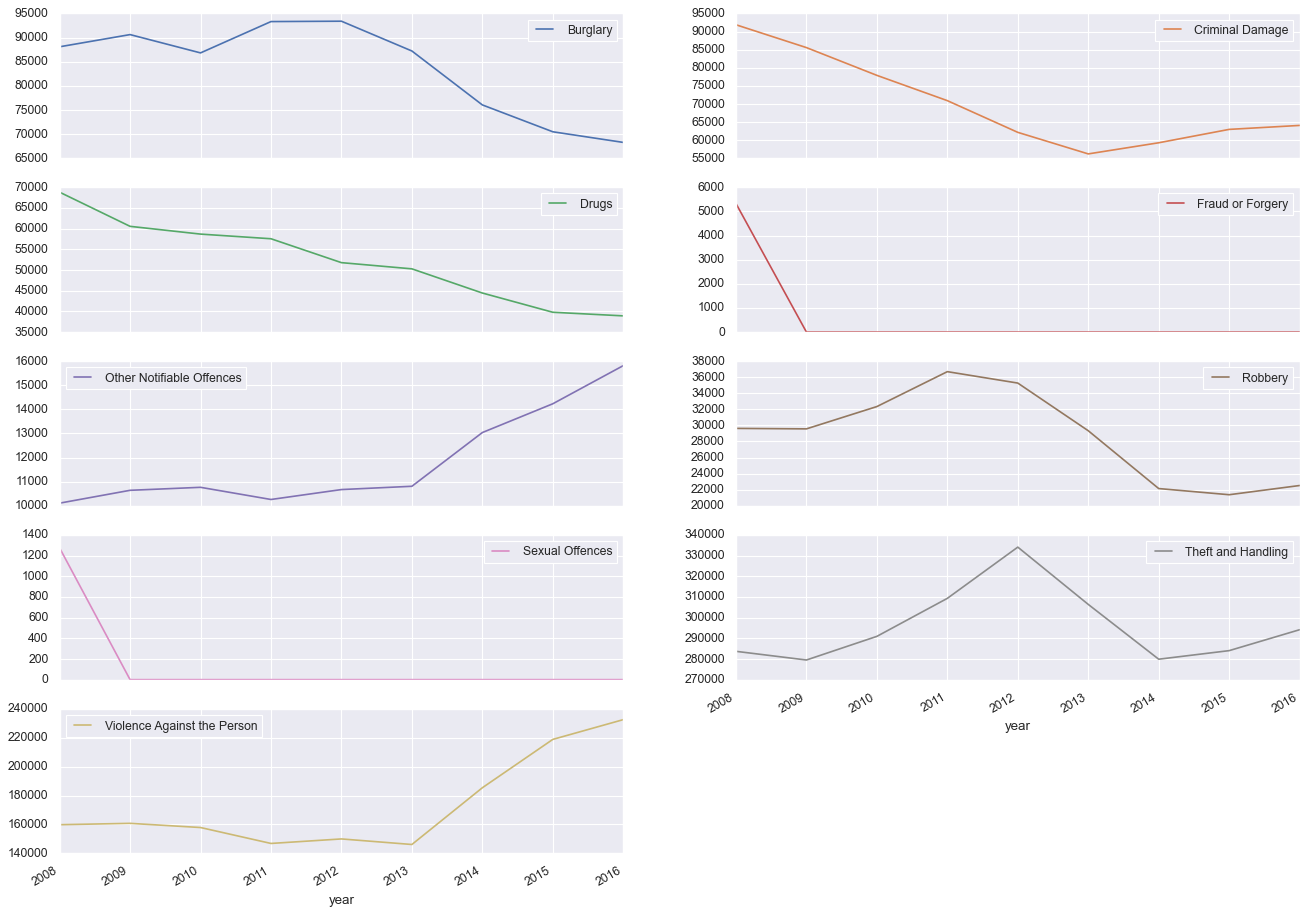

In [42]:
# Pivot to make each category a column
growing_crime_pivot = growing_crime.pivot(columns = 'major_category', values = 'Total_Crime') 
# Subplotting to see all plots separately - important since vastly different scales
growing_crime_pivot.plot(kind="line", subplots = True, figsize=(20, 15), layout = (5, 2)) 


plt.show() # Show plot

In [43]:
# Calculate the percent change from the previous year's figure
growing_crime['percent_change'] = growing_crime['Total_Crime'] / growing_crime['Total_Crime'] \
                                 .groupby(growing_crime['major_category']).shift(1) - 1
# NB I tried to use pct_change() but couldn't get it to work with a groupby() as well
growing_crime.head(20)

year               major_category  Total_Crime  percent_change
year                                                                      
2008-01-01  2008                     Burglary        88092             NaN
2008-01-01  2008              Criminal Damage        91872             NaN
2008-01-01  2008                        Drugs        68804             NaN
2008-01-01  2008             Fraud or Forgery         5325             NaN
2008-01-01  2008    Other Notifiable Offences        10112             NaN
2008-01-01  2008                      Robbery        29627             NaN
2008-01-01  2008              Sexual Offences         1273             NaN
2008-01-01  2008           Theft and Handling       283692             NaN
2008-01-01  2008  Violence Against the Person       159844             NaN
2009-01-01  2009                     Burglary        90619        0.028686
2009-01-01  2009              Criminal Damage        85565       -0.068650
2009-01-01  2009                        Drugs        60549       -0.119978
2009-01-01  2009             Fraud or Forgery            0       -1.000000
2009-01-01  2009    Other Notifiable Offences        10644        0.052611
2009-01-01  2009                      Robbery        29568       -0.001991
2009-01-01  2009              Sexual Offences            0       -1.000000
2009-01-01  2009           Theft and Handling       279492       -0.014805
2009-01-01  2009  Violence Against the Person       160777        0.005837
2010-01-01  2010                     Burglary        86826       -0.041857
2010-01-01  2010              Criminal Damage        77897       -0.089616

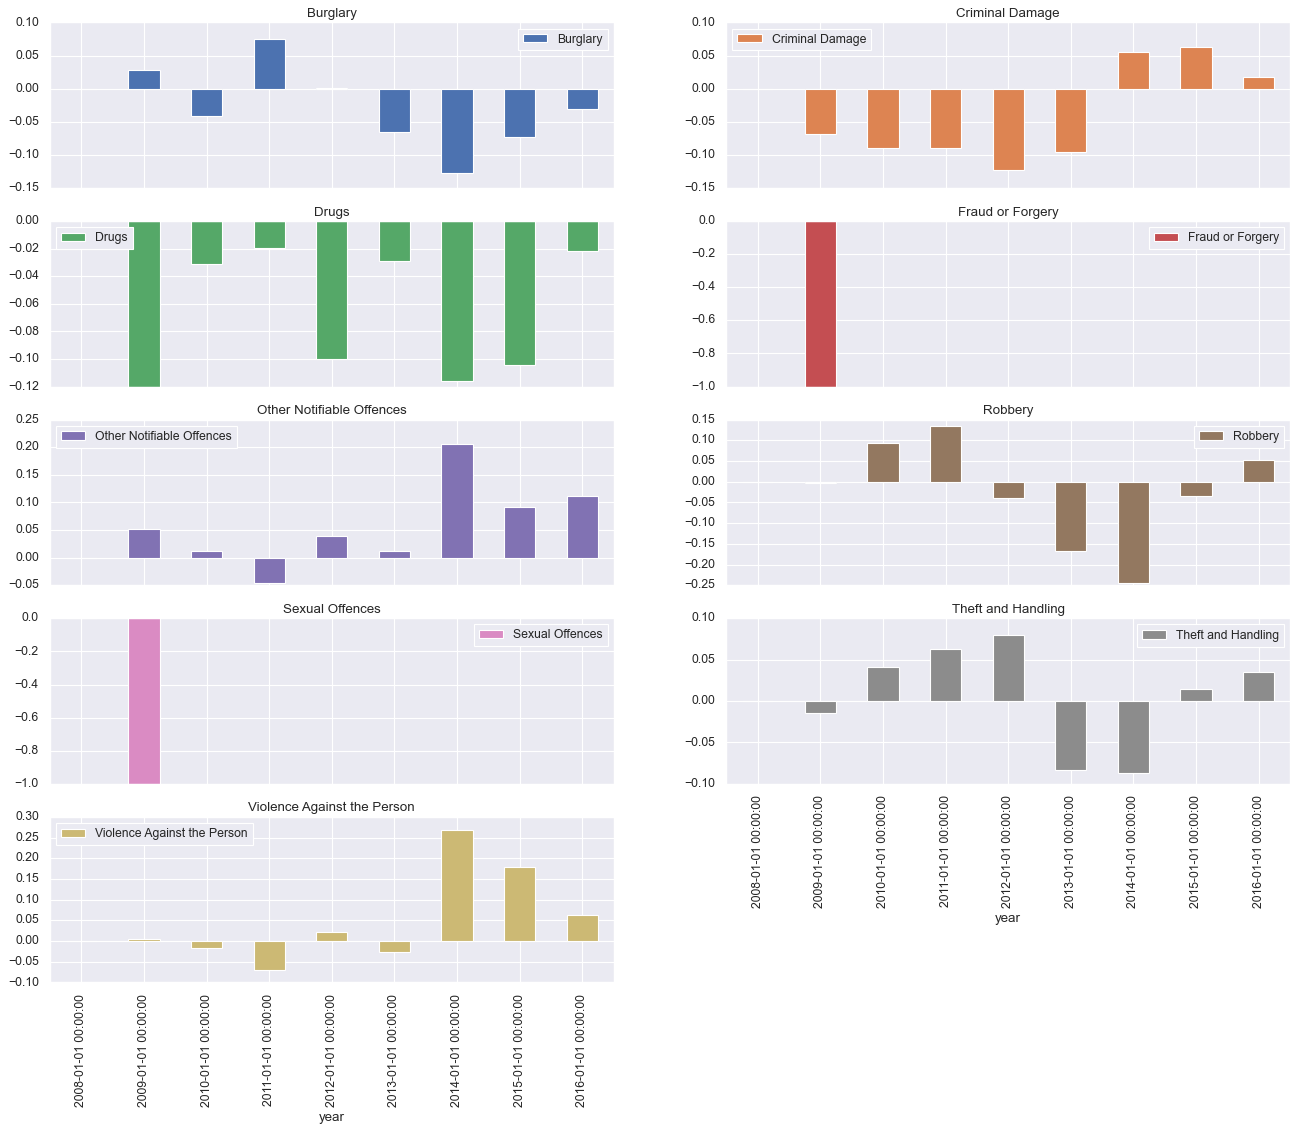

In [44]:
# Pivot to make each category a column
growing_crime_pivot = growing_crime.pivot(columns = 'major_category', values = 'percent_change') 
# Subplotting to see all plots separately - important since vastly different scales
growing_crime_pivot.plot(kind="bar", subplots = True, figsize=(20, 15), layout = (5, 2)) 


plt.show() # Show plot